This notebook is created for CS534: Machine learning HW3.
It is modified by Alireza Rafiei (my Kaggle account: https://www.kaggle.com/alirezaae), and the git repo of this code is: "
https://github.com/AlirezaRafiei9/CS534/tree/main/HW3".<br>
The aim is to experiment with convolutional neural networks for computer vision tasks, specifically distinguishing cats vs. dogs images, using Keras, Google's Colaboratory environment, and GPU hardware acceleration. <br>
In this regard, three main tasks are designed:<br>
P1: Baseline CNN performance and hyper-parameter  and architecture tuning<br>
P2: Data Augmentation and Dropout<br>
P3: Using Pre-trained models and fine-tuning<br>

I've provided a comment on the variations I've tried and indicated the best one for each problem.<br>



This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 16s 4ms/step - loss: 0.1538 - accuracy: 0.9524
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0448 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0306 - accuracy: 0.9910
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0187 - accuracy: 0.9941


**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9934
Test accuracy: 0.993


### Main Assignment: Training a convnet from scratch on a small dataset

### Downloading the data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezaae","key":"fd7ff2469f88464d0c2d9c4a50ae9f1f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:04<00:00, 292MB/s]
100% 812M/812M [00:04<00:00, 203MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("collab2")

!ls '.'

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

dogs-vs-cats.zip  sample_data		test1.zip  train.zip
kaggle.json	  sampleSubmission.csv	train


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

## P1: Baseline CNN performance and hyper-parameter and architecture tuning:

For this part, I've tried the following variations. The modifications have been done by adding layer(s), removing layer(s), and changing the set hyper-parameter(s) (while a convolution layer always followed with a pooling layer), and each variation was trained in 30 epochs. Also, the train and test accuracies are reported and plotted for every single variation.<br>
Variation #3 had the best test accuracy among the experimented variations.


**Summary of experimented variations:**
<br>
V#0: Test accuracy = 0.717<br>
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.Flatten()(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#1: Test accuracy = 0.632<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.Flatten()(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#2: Test accuracy = 0.659<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.Flatten()(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#3: Test accuracy = 0.711<br>
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.Flatten()(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#4: Test accuracy = 0.695<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.Flatten()(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#5: Test accuracy = 0.651<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.Flatten()(x)<br>
x = layers.Dense(64, activation="relu")(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#6: Test accuracy = 0.697<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Flatten()(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>
<br>
V#7: Test accuracy = 0.663<br>
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)<br>
x = layers.MaxPooling2D(pool_size=2)(x)<br>
x = layers.Flatten()(x)<br>
x = layers.Dense(64, activation="relu")(x)<br>
outputs = layers.Dense(1, activation="sigmoid")(x)<br>


###V#0: The defualt model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

###V#1: removing one cnn block.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 43, 43, 128)      0         
 g2D)                                                      

###V#2: removing two cnn blocks.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 87, 87, 256)       147712    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 43, 43, 256)      0         
 g2D)                                                      

###V#3: adding one cnn block.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

###V#4: adding a cnn block and incresing the number of filters.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

###V#5: adding a cnn block and a dence layer with incresing the number of filters.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

The question asked us to alwasys follow a convolution layer with a pooling layer. Nonetheless, in the last cnn block of the defult model, we don't have a pooling layer (there is just a conv layer). Therefore, I've expremented the following variations as well. (we are not able to add more extra cnn blocks with this input size)
###V#6: removing a cnn block, adding a maxpooling, and incresing the number of filters.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 89, 89, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 87, 87, 128)       147584    
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 43, 43, 128)      0         
 g2D)                                                      

###V#7: adding a dence layer, adding a maxpooling, and incresing the number of filters.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_69 (Conv2D)          (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 89, 89, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 87, 87, 128)       73856     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 43, 43, 128)      0         
 g2D)                                                     

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

###Fitting V0:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 137ms/step - loss: 0.6986 - accuracy: 0.5210 - val_loss: 6.7933 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 9s 138ms/step - loss: 0.7695 - accuracy: 0.5675 - val_loss: 0.6400 - val_accuracy: 0.6510
Epoch 3/30
63/63 [==============================] - 6s 77ms/step - loss: 0.6649 - accuracy: 0.6215 - val_loss: 0.6156 - val_accuracy: 0.6460
Epoch 4/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6374 - accuracy: 0.6495 - val_loss: 0.6100 - val_accuracy: 0.6700
Epoch 5/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6047 - accuracy: 0.6740 - val_loss: 0.6324 - val_accuracy: 0.6150
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5607 - accuracy: 0.7150 - val_loss: 0.6521 - val_accuracy: 0.6470
Epoch 7/30
63/63 [==============================] - 5s 71ms/step - loss: 0.5232 - accuracy: 0.7465 - val_loss: 0.5837 - val_accuracy: 0.7000
Epoch 8/30

**Displaying curves of loss and accuracy during training**

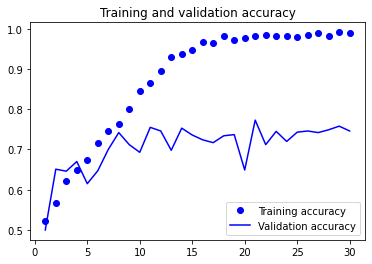

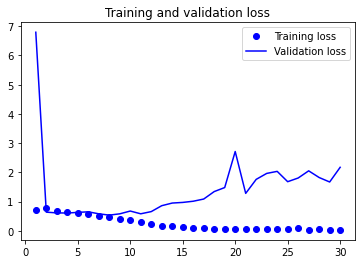

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 38ms/step - loss: 0.5593 - accuracy: 0.7170
Test accuracy: 0.717


###Fitting V1:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 141ms/step - loss: 0.9767 - accuracy: 0.5225 - val_loss: 0.6903 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 7s 102ms/step - loss: 0.7083 - accuracy: 0.5395 - val_loss: 0.6862 - val_accuracy: 0.5380
Epoch 3/30
63/63 [==============================] - 7s 102ms/step - loss: 0.6990 - accuracy: 0.5590 - val_loss: 0.7257 - val_accuracy: 0.5220
Epoch 4/30
63/63 [==============================] - 7s 105ms/step - loss: 0.6745 - accuracy: 0.6200 - val_loss: 0.6824 - val_accuracy: 0.5690
Epoch 5/30
63/63 [==============================] - 7s 108ms/step - loss: 0.6195 - accuracy: 0.6585 - val_loss: 0.7021 - val_accuracy: 0.5850
Epoch 6/30
63/63 [==============================] - 8s 123ms/step - loss: 0.6021 - accuracy: 0.7005 - val_loss: 0.6698 - val_accuracy: 0.6220
Epoch 7/30
63/63 [==============================] - 7s 102ms/step - loss: 0.5424 - accuracy: 0.7290 - val_loss: 1.5308 - val_accuracy: 0.6040
Epoch

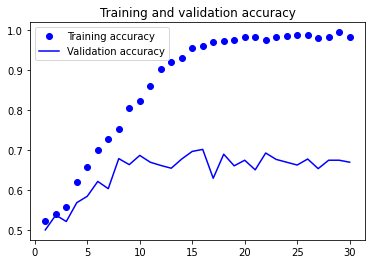

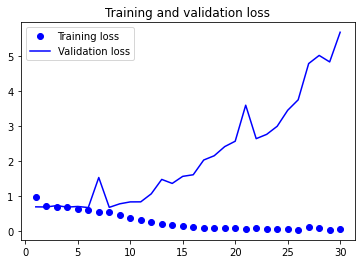

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 41ms/step - loss: 0.6595 - accuracy: 0.6320
Test accuracy: 0.632


###Fitting V2:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 146ms/step - loss: 1.1259 - accuracy: 0.5340 - val_loss: 0.6866 - val_accuracy: 0.5140
Epoch 2/30
63/63 [==============================] - 8s 129ms/step - loss: 0.7622 - accuracy: 0.5595 - val_loss: 0.7227 - val_accuracy: 0.5760
Epoch 3/30
63/63 [==============================] - 10s 149ms/step - loss: 0.6493 - accuracy: 0.6525 - val_loss: 0.6214 - val_accuracy: 0.6470
Epoch 4/30
63/63 [==============================] - 9s 132ms/step - loss: 0.5700 - accuracy: 0.7120 - val_loss: 0.7250 - val_accuracy: 0.6360
Epoch 5/30
63/63 [==============================] - 8s 127ms/step - loss: 0.4866 - accuracy: 0.7730 - val_loss: 0.7552 - val_accuracy: 0.6850
Epoch 6/30
63/63 [==============================] - 9s 142ms/step - loss: 0.3838 - accuracy: 0.8395 - val_loss: 0.7105 - val_accuracy: 0.6730
Epoch 7/30
63/63 [==============================] - 9s 139ms/step - loss: 0.2822 - accuracy: 0.8820 - val_loss: 0.8521 - val_accuracy: 0.6820
Epoc

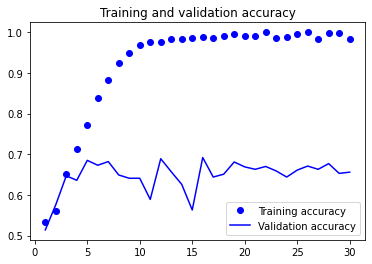

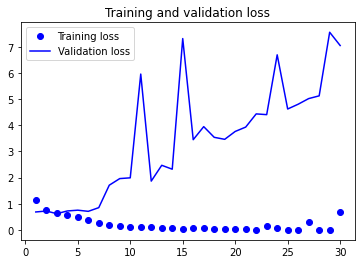

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 47ms/step - loss: 0.6266 - accuracy: 0.6590
Test accuracy: 0.659


###Fitting V3:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 80ms/step - loss: 0.7312 - accuracy: 0.5130 - val_loss: 0.6866 - val_accuracy: 0.6420
Epoch 2/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6930 - accuracy: 0.5670 - val_loss: 0.6810 - val_accuracy: 0.5360
Epoch 3/30
63/63 [==============================] - 6s 92ms/step - loss: 0.6916 - accuracy: 0.5905 - val_loss: 0.6522 - val_accuracy: 0.6390
Epoch 4/30
63/63 [==============================] - 6s 90ms/step - loss: 0.6624 - accuracy: 0.6200 - val_loss: 0.6072 - val_accuracy: 0.6640
Epoch 5/30
63/63 [==============================] - 7s 101ms/step - loss: 0.6181 - accuracy: 0.6815 - val_loss: 0.6333 - val_accuracy: 0.6420
Epoch 6/30
63/63 [==============================] - 7s 113ms/step - loss: 0.5868 - accuracy: 0.7070 - val_loss: 0.6320 - val_accuracy: 0.6270
Epoch 7/30
63/63 [==============================] - 7s 106ms/step - loss: 0.5514 - accuracy: 0.7215 - val_loss: 0.7003 - val_accuracy: 0.6160
Epoch 8/30

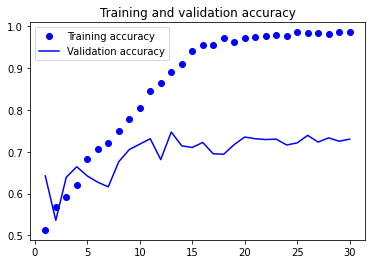

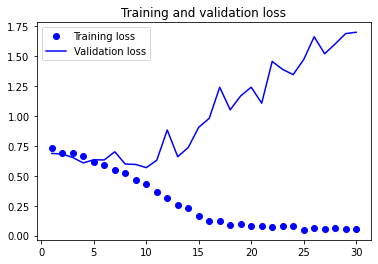

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 43ms/step - loss: 0.5844 - accuracy: 0.7110
Test accuracy: 0.711


###Fitting V4:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 98ms/step - loss: 0.7252 - accuracy: 0.5270 - val_loss: 0.7616 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 84ms/step - loss: 0.7088 - accuracy: 0.5485 - val_loss: 0.7229 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 6s 85ms/step - loss: 0.6884 - accuracy: 0.5770 - val_loss: 0.6281 - val_accuracy: 0.6650
Epoch 4/30
63/63 [==============================] - 6s 97ms/step - loss: 0.6575 - accuracy: 0.6125 - val_loss: 0.6546 - val_accuracy: 0.6000
Epoch 5/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6421 - accuracy: 0.6515 - val_loss: 0.6139 - val_accuracy: 0.6600
Epoch 6/30
63/63 [==============================] - 6s 84ms/step - loss: 0.5887 - accuracy: 0.7045 - val_loss: 0.5841 - val_accuracy: 0.6910
Epoch 7/30
63/63 [==============================] - 6s 84ms/step - loss: 0.5567 - accuracy: 0.7215 - val_loss: 0.5811 - val_accuracy: 0.6890
Epoch 8/30
63

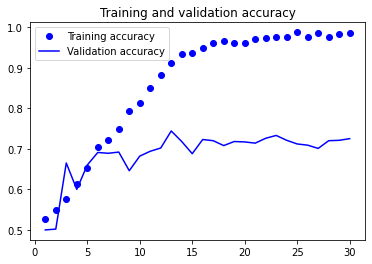

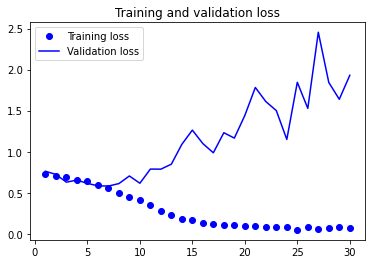

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 61ms/step - loss: 0.5883 - accuracy: 0.6950
Test accuracy: 0.695


###Fitting V5:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 10s 124ms/step - loss: 0.7570 - accuracy: 0.5180 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6959 - accuracy: 0.5300 - val_loss: 0.6879 - val_accuracy: 0.5070
Epoch 3/30
63/63 [==============================] - 6s 87ms/step - loss: 0.8337 - accuracy: 0.5590 - val_loss: 0.6802 - val_accuracy: 0.6280
Epoch 4/30
63/63 [==============================] - 11s 163ms/step - loss: 0.6806 - accuracy: 0.5930 - val_loss: 0.7457 - val_accuracy: 0.5140
Epoch 5/30
63/63 [==============================] - 7s 111ms/step - loss: 0.6605 - accuracy: 0.6190 - val_loss: 0.6595 - val_accuracy: 0.5840
Epoch 6/30
63/63 [==============================] - 7s 104ms/step - loss: 0.6341 - accuracy: 0.6650 - val_loss: 0.6298 - val_accuracy: 0.6270
Epoch 7/30
63/63 [==============================] - 7s 114ms/step - loss: 0.5940 - accuracy: 0.6865 - val_loss: 0.6199 - val_accuracy: 0.6420
Epoch 

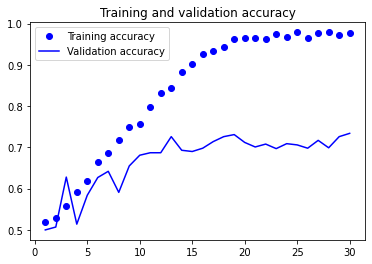

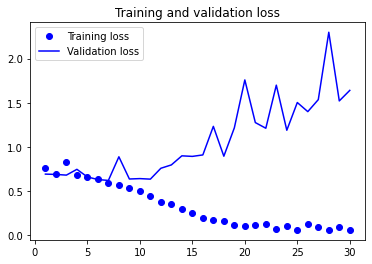

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.6325 - accuracy: 0.6515
Test accuracy: 0.651


###Fitting V6:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 158ms/step - loss: 0.8989 - accuracy: 0.5070 - val_loss: 0.6861 - val_accuracy: 0.4990
Epoch 2/30
63/63 [==============================] - 9s 138ms/step - loss: 0.7731 - accuracy: 0.5300 - val_loss: 0.6825 - val_accuracy: 0.5310
Epoch 3/30
63/63 [==============================] - 9s 141ms/step - loss: 0.7159 - accuracy: 0.6075 - val_loss: 0.6488 - val_accuracy: 0.6250
Epoch 4/30
63/63 [==============================] - 10s 150ms/step - loss: 0.6476 - accuracy: 0.6300 - val_loss: 0.6334 - val_accuracy: 0.6720
Epoch 5/30
63/63 [==============================] - 10s 149ms/step - loss: 0.6269 - accuracy: 0.6570 - val_loss: 0.6932 - val_accuracy: 0.6520
Epoch 6/30
63/63 [==============================] - 10s 144ms/step - loss: 0.5919 - accuracy: 0.6840 - val_loss: 0.6649 - val_accuracy: 0.6600
Epoch 7/30
63/63 [==============================] - 9s 144ms/step - loss: 0.5709 - accuracy: 0.7045 - val_loss: 0.5998 - val_accuracy: 0.6960
Ep

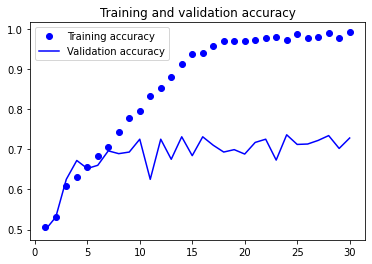

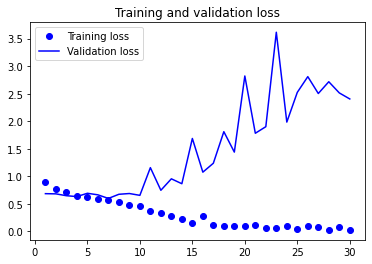

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 51ms/step - loss: 0.5986 - accuracy: 0.6965
Test accuracy: 0.697


###Fitting V7:

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 9s 114ms/step - loss: 0.7430 - accuracy: 0.5100 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 7s 104ms/step - loss: 0.7141 - accuracy: 0.5415 - val_loss: 0.6829 - val_accuracy: 0.6010
Epoch 3/30
63/63 [==============================] - 8s 117ms/step - loss: 0.6833 - accuracy: 0.5665 - val_loss: 0.7127 - val_accuracy: 0.5120
Epoch 4/30
63/63 [==============================] - 8s 128ms/step - loss: 0.6824 - accuracy: 0.5870 - val_loss: 0.6609 - val_accuracy: 0.5860
Epoch 5/30
63/63 [==============================] - 8s 120ms/step - loss: 0.6649 - accuracy: 0.6325 - val_loss: 0.6529 - val_accuracy: 0.6070
Epoch 6/30
63/63 [==============================] - 7s 104ms/step - loss: 0.6544 - accuracy: 0.6460 - val_loss: 0.6991 - val_accuracy: 0.6460
Epoch 7/30
63/63 [==============================] - 7s 104ms/step - loss: 0.6119 - accuracy: 0.6775 - val_loss: 0.6336 - val_accuracy: 0.6320
Epoch 

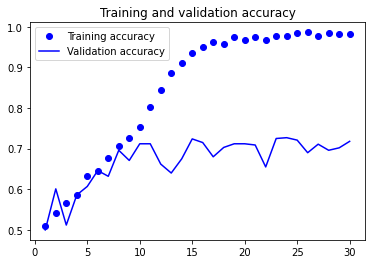

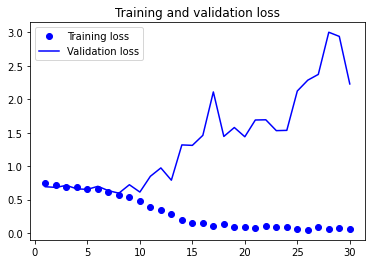

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 42ms/step - loss: 0.6110 - accuracy: 0.6625
Test accuracy: 0.663


### Using data augmentation

**Define a data augmentation stage to add to an image model**

## P2: Data Augmentation and Dropout

I've experimented with the following variations for data augmentation values/options and dropout hyper-parameter. The modifications have been done by changing, adding, and removing data augmentation operators and changing the dropout rate of the dropout layer. The variations were trained in 100 epochs, and the test accuracy is reported for every single variation.<br>
<br>
For the extra credit part, I've experimented with random shifts/translation, random noise injection, random contrast, and random brightness data augmentation operations with different values (see the following cell). The random shifts/translation, random contrast, and random brightness data augmentation operations can be directly added to the "keras.Sequential" function to produce augmented data; however, "keras.layers.GaussianNoise" function cannot be added with the current code structure to produce noise injected data. Thus, we should consider either directly adding noise to the data or use keras.preprocessing.image.ImageDataGenerator function to apply noise injection to the data. <br>
Of all tested variations, variation # 1 resulted in the best test accuracy. 


**Experimented variations:**<br>
V#1: Test accuracy = 0.859<br>
layers.RandomFlip("horizontal")<br>
layers.RandomRotation(0.1)<br>
layers.RandomZoom(0.2)<br>
x = layers.Dropout(0.5)(x)<br>
<br>
V#2: Test accuracy = 0.727<br>
layers.RandomFlip("vertical"),<br>
layers.RandomRotation(0.25),<br>
layers.RandomZoom(0.15),<br>
x = layers.Dropout(0.4)(x)<br>
<br>
V#3: Test accuracy = 0.736<br>
layers.RandomFlip("horizontal_and_vertical"),<br>
layers.RandomRotation(0.05),<br>
layers.RandomZoom(0.1),<br>
x = layers.Dropout(0.3)(x)<br>
<br>
V#4: Test accuracy = 0.761<br>
layers.RandomFlip("horizontal_and_vertical")<br>
layers.RandomRotation(0.3)<br>
layers.RandomZoom(0.3)<br>
x = layers.Dropout(0.45)(x)<br>
<br>
V#5: Test accuracy = 0.712<br>
layers.RandomFlip("horizontal_and_vertical"),<br>
layers.RandomRotation(0.25),<br>
layers.RandomZoom(0.25),<br>
layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3))<br>
x = layers.Dropout(0.2)(x)<br>
<br>
V#6: Test accuracy = 0.807<br>
layers.RandomFlip("horizontal_and_vertical"),<br>
layers.RandomRotation(0.1),<br>
layers.RandomZoom(0.1),<br>
layers.RandomContrast(0.1),<br>
layers.RandomBrightness(0.1),<br>
x = layers.Dropout(0.55)(x)<br>
<br>
V#7: Test accuracy = 0.758<br>
layers.RandomFlip("horizontal_and_vertical"),<br>
layers.RandomRotation(0.3),<br>
layers.RandomZoom(0.15),<br>
layers.RandomTranslation(height_factor=(0.1), width_factor=(0.15)),<br>
layers.RandomContrast(0.25),<br>
layers.RandomBrightness(0.2),<br>
x = layers.Dropout(0.35)(x)<br>
<br>
V#8: Test accuracy = 0.729<br>
layers.RandomFlip("horizontal"),<br>
layers.RandomRotation(0.2),<br>
layers.RandomZoom(0.1),<br>
layers.RandomTranslation(height_factor=(0.2), width_factor=(0.1)),<br>
layers.RandomContrast(0.3),<br>
layers.RandomBrightness(0.1),<br>
x = layers.Dropout(0.35)(x)<br>
<br>
tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=add_noise,
)


###V#1:

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),

    ]
)

**Displaying some randomly augmented training images**

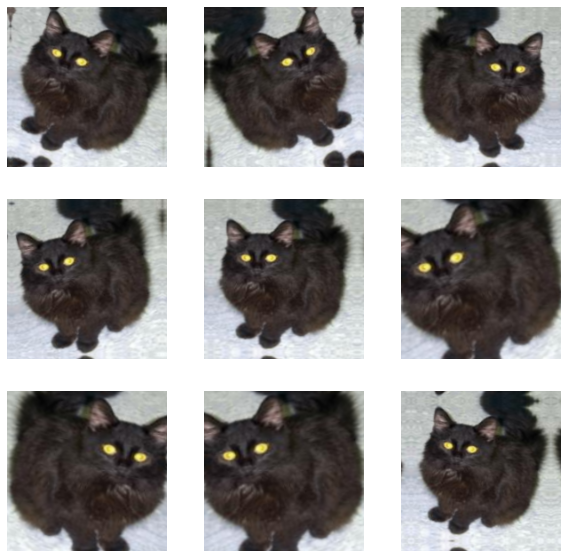

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 19s 128ms/step - loss: 0.7818 - accuracy: 0.5055 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 8s 128ms/step - loss: 0.6961 - accuracy: 0.5040 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 8s 107ms/step - loss: 0.7024 - accuracy: 0.5145 - val_loss: 0.6836 - val_accuracy: 0.5770
Epoch 4/100
63/63 [==============================] - 9s 127ms/step - loss: 0.6739 - accuracy: 0.5920 - val_loss: 0.6907 - val_accuracy: 0.5710
Epoch 5/100
63/63 [==============================] - 10s 149ms/step - loss: 0.6626 - accuracy: 0.6150 - val_loss: 0.6723 - val_accuracy: 0.5850
Epoch 6/100
63/63 [==============================] - 9s 132ms/step - loss: 0.6465 - accuracy: 0.6240 - val_loss: 0.6229 - val_accuracy: 0.6300
Epoch 7/100
63/63 [==============================] - 8s 111ms/step - loss: 0.6315 - accuracy: 0.6430 - val_loss: 0.6249 - val_accuracy: 0.67

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 40ms/step - loss: 0.5035 - accuracy: 0.8590
Test accuracy: 0.859


###V#2: 

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.25),
        layers.RandomZoom(0.15),

    ]
)

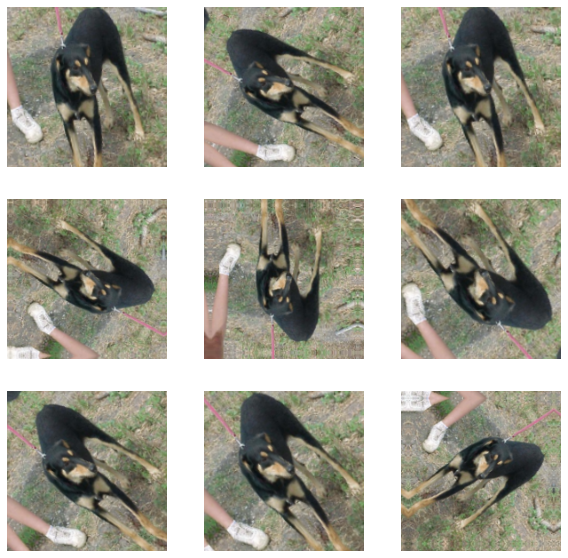

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 97ms/step - loss: 0.8280 - accuracy: 0.5005 - val_loss: 0.6918 - val_accuracy: 0.5460
Epoch 2/100
63/63 [==============================] - 6s 93ms/step - loss: 0.7017 - accuracy: 0.5450 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 6s 96ms/step - loss: 0.6989 - accuracy: 0.5140 - val_loss: 0.6866 - val_accuracy: 0.5210
Epoch 4/100
63/63 [==============================] - 6s 93ms/step - loss: 0.6937 - accuracy: 0.5405 - val_loss: 0.6791 - val_accuracy: 0.5720
Epoch 5/100
63/63 [==============================] - 6s 93ms/step - loss: 0.6749 - accuracy: 0.5775 - val_loss: 0.7353 - val_accuracy: 0.5430
Epoch 6/100
63/63 [==============================] - 6s 94ms/step - loss: 0.6723 - accuracy: 0.6105 - val_loss: 0.6483 - val_accuracy: 0.6020
Epoch 7/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6554 - accuracy: 0.6395 - val_loss: 0.6227 - val_accuracy: 0.6370
Epoch 

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 63ms/step - loss: 0.5448 - accuracy: 0.7270
Test accuracy: 0.727


###V#3:

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.1),

    ]
)

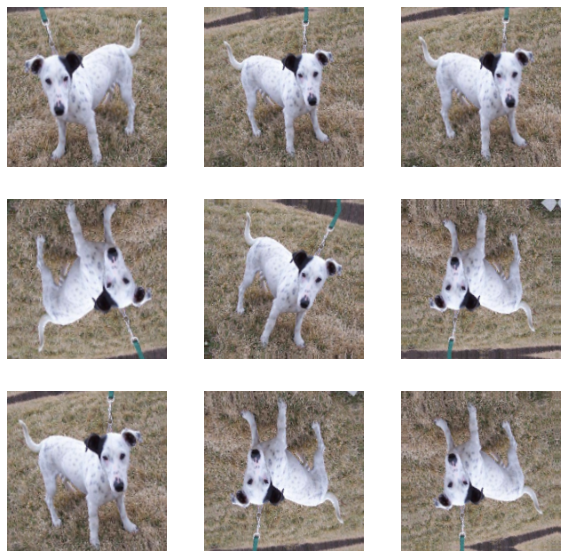

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 11s 112ms/step - loss: 0.7114 - accuracy: 0.4970 - val_loss: 0.6911 - val_accuracy: 0.5920
Epoch 2/100
63/63 [==============================] - 7s 103ms/step - loss: 0.7106 - accuracy: 0.5240 - val_loss: 0.6825 - val_accuracy: 0.5270
Epoch 3/100
63/63 [==============================] - 7s 102ms/step - loss: 0.6835 - accuracy: 0.5815 - val_loss: 0.6370 - val_accuracy: 0.6320
Epoch 4/100
63/63 [==============================] - 7s 102ms/step - loss: 0.6461 - accuracy: 0.6370 - val_loss: 0.9429 - val_accuracy: 0.5710
Epoch 5/100
63/63 [==============================] - 7s 104ms/step - loss: 0.6486 - accuracy: 0.6550 - val_loss: 0.6097 - val_accuracy: 0.6520
Epoch 6/100
63/63 [==============================] - 7s 102ms/step - loss: 0.6150 - accuracy: 0.6750 - val_loss: 0.6633 - val_accuracy: 0.6780
Epoch 7/100
63/63 [==============================] - 7s 103ms/step - loss: 0.6103 - accuracy: 0.6730 - val_loss: 0.6058 - val_accuracy: 0.650

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 36ms/step - loss: 0.5308 - accuracy: 0.7360
Test accuracy: 0.736


###V#4:

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.3),

    ]
)

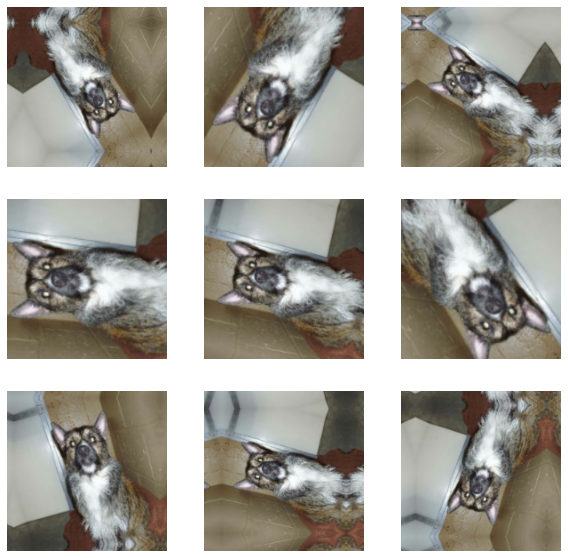

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.45)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 17s 114ms/step - loss: 0.7231 - accuracy: 0.5050 - val_loss: 0.6927 - val_accuracy: 0.4990
Epoch 2/100
63/63 [==============================] - 7s 105ms/step - loss: 0.6870 - accuracy: 0.5465 - val_loss: 0.6788 - val_accuracy: 0.5320
Epoch 3/100
63/63 [==============================] - 7s 104ms/step - loss: 0.6946 - accuracy: 0.5600 - val_loss: 0.6782 - val_accuracy: 0.5670
Epoch 4/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6677 - accuracy: 0.5980 - val_loss: 0.8518 - val_accuracy: 0.5050
Epoch 5/100
63/63 [==============================] - 7s 104ms/step - loss: 0.6502 - accuracy: 0.6200 - val_loss: 0.7916 - val_accuracy: 0.5650
Epoch 6/100
63/63 [==============================] - 7s 105ms/step - loss: 0.6405 - accuracy: 0.6415 - val_loss: 0.6633 - val_accuracy: 0.6070
Epoch 7/100
63/63 [==============================] - 10s 150ms/step - loss: 0.6524 - accuracy: 0.6315 - val_loss: 0.6188 - val_accuracy: 0.64

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 38ms/step - loss: 0.5444 - accuracy: 0.7605
Test accuracy: 0.761


###V#5:

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.25),
        layers.RandomZoom(0.25),
        layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3))

    ]
)

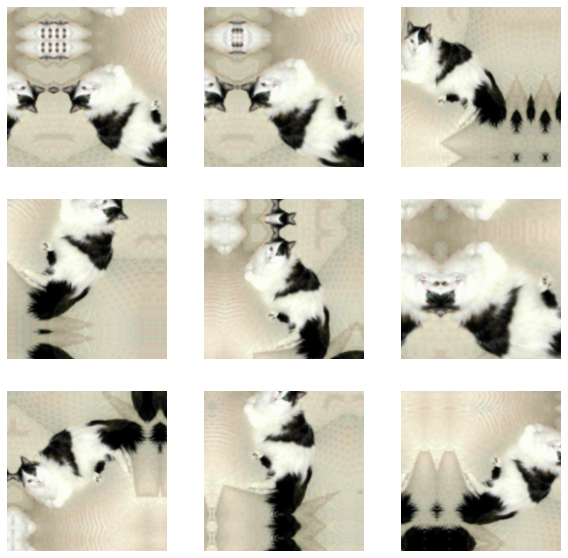

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - 20s 220ms/step - loss: 0.7750 - accuracy: 0.5250 - val_loss: 0.6876 - val_accuracy: 0.5250
Epoch 2/100
63/63 [==============================] - 14s 211ms/step - loss: 0.6947 - accuracy: 0.5085 - val_loss: 0.6883 - val_accuracy: 0.5350
Epoch 3/100
63/63 [==============================] - 14s 211ms/step - loss: 0.6985 - accuracy: 0.5250 - val_loss: 0.6833 - val_accuracy: 0.5260
Epoch 4/100
63/63 [==============================] - 14s 215ms/step - loss: 0.7134 - accuracy: 0.5485 - val_loss: 0.6564 - val_accuracy: 0.6510
Epoch 5/100
63/63 [==============================] - 13s 210ms/step - loss: 0.6726 - accuracy: 0.5915 - val_loss: 0.6637 - val_accuracy: 0.5940
Epoch 6/100
63/63 [==============================] - 14s 217ms/step - loss: 0.6686 - accuracy: 0.6045 - val_loss: 0.6606 - val_accuracy: 0.6220
Epoch 7/100
63/63 [==============================] - 13s 210ms/step - loss: 0.6946 - accuracy: 0.5980 - val_loss: 0.6311 - val_accuracy: 0.6250
Epoc

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 37ms/step - loss: 0.5665 - accuracy: 0.7125
Test accuracy: 0.712


###V#6:

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),

    ]
)

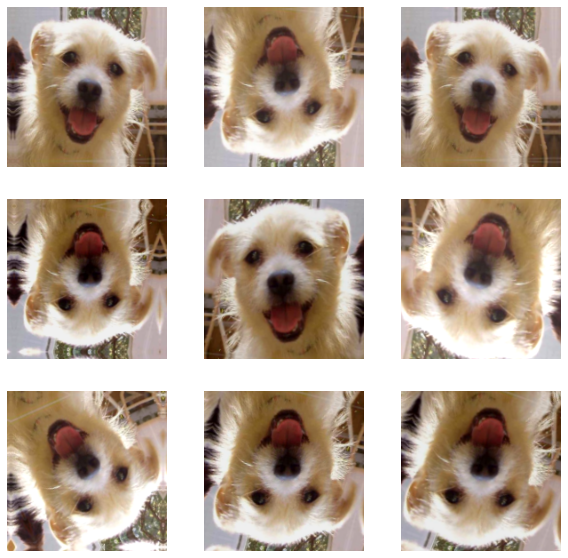

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.55)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - 24s 276ms/step - loss: 0.7128 - accuracy: 0.5135 - val_loss: 0.6920 - val_accuracy: 0.5040
Epoch 2/100
63/63 [==============================] - 17s 274ms/step - loss: 0.6980 - accuracy: 0.5290 - val_loss: 0.6797 - val_accuracy: 0.6100
Epoch 3/100
63/63 [==============================] - 17s 265ms/step - loss: 0.6940 - accuracy: 0.5795 - val_loss: 0.6619 - val_accuracy: 0.5760
Epoch 4/100
63/63 [==============================] - 17s 270ms/step - loss: 0.6611 - accuracy: 0.6035 - val_loss: 0.6404 - val_accuracy: 0.6210
Epoch 5/100
63/63 [==============================] - 18s 281ms/step - loss: 0.6640 - accuracy: 0.6260 - val_loss: 0.6552 - val_accuracy: 0.6010
Epoch 6/100
63/63 [==============================] - 17s 261ms/step - loss: 0.6402 - accuracy: 0.6405 - val_loss: 0.6226 - val_accuracy: 0.6450
Epoch 7/100
63/63 [==============================] - 17s 271ms/step - loss: 0.6252 - accuracy: 0.6460 - val_loss: 0.6017 - val_accuracy: 0.6650
Epoc

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 37ms/step - loss: 0.5057 - accuracy: 0.8070
Test accuracy: 0.807


###V#7:

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.15),
        layers.RandomTranslation(height_factor=(0.1), width_factor=(0.15)),
        layers.RandomContrast(0.25),
        layers.RandomBrightness(0.2),

    ]
)

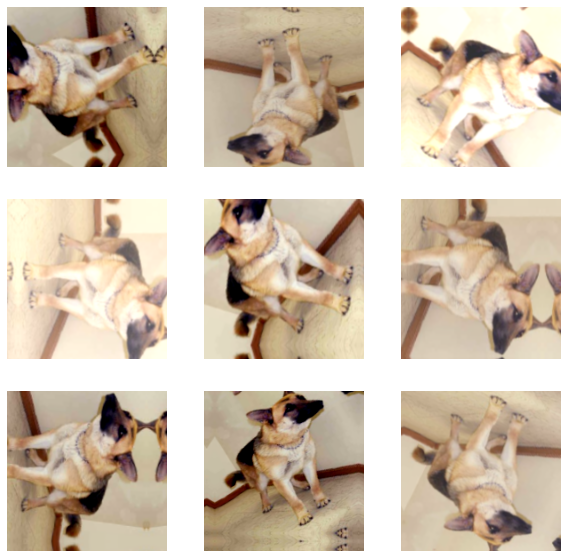

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


63/63 [==============================] - 31s 367ms/step - loss: 0.7180 - accuracy: 0.5095 - val_loss: 0.6895 - val_accuracy: 0.5050
Epoch 2/100
63/63 [==============================] - 22s 353ms/step - loss: 0.7168 - accuracy: 0.5380 - val_loss: 0.7850 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 24s 370ms/step - loss: 0.6824 - accuracy: 0.5620 - val_loss: 0.6716 - val_accuracy: 0.6170
Epoch 4/100
63/63 [==============================] - 23s 356ms/step - loss: 0.6855 - accuracy: 0.5765 - val_loss: 0.6671 - val_accuracy: 0.5230
Epoch 5/100
63/63 [==============================] - 24s 373ms/step - loss: 0.6706 - accuracy: 0.5935 - val_loss: 0.7718 - val_accuracy: 0.5910
Epoch 6/100
63/63 [==============================] - 23s 365ms/step - loss: 0.6765 - accuracy: 0.6020 - val_loss: 0.6423 - val_accuracy: 0.6270
Epoch 7/100
63/63 [==============================] - 23s 353ms/step - loss: 0.6760 - accuracy: 0.6100 - val_loss: 0.6182 - val_accuracy: 0.6310
Epoc

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 36ms/step - loss: 0.5352 - accuracy: 0.7585
Test accuracy: 0.758


###V#8:

In [ ]:
# Noise injection
'''
As "layers.GaussianNoise" cannot be added to the currently provided "Sequential" coding structure,
it should be directly added to the data. Therefore, for implementing the noise injection 
data augmentation method, we should add noise to the data before passing it onto the model. 
To do so, I've considered Gaussian noise with a standard deviation of 0.2 to data (see the following cell).
However, this approach does not add new data for the training part. Hence, we need to use the ImageDataGenerator
function to generate new noisy data. In this regard, I've used this function with all possible data augmentation
methods on image data (see the following cells).
'''
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(height_factor=(0.2), width_factor=(0.1)),
        layers.RandomContrast(0.3),
        layers.RandomBrightness(0.1),

    ]
)

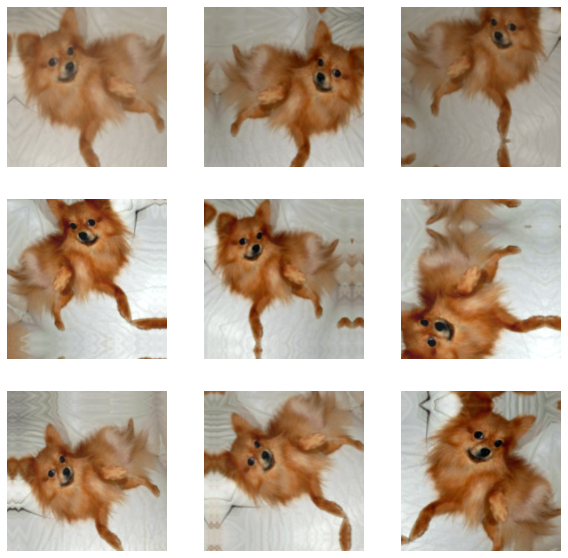

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.GaussianNoise(0.2)(x)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 17s 85ms/step - loss: 0.7195 - accuracy: 0.5240 - val_loss: 1.9727 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 5s 74ms/step - loss: 0.7157 - accuracy: 0.5555 - val_loss: 0.6750 - val_accuracy: 0.6050
Epoch 3/100
63/63 [==============================] - 5s 75ms/step - loss: 0.6857 - accuracy: 0.6090 - val_loss: 0.6195 - val_accuracy: 0.6510
Epoch 4/100
63/63 [==============================] - 5s 73ms/step - loss: 0.6302 - accuracy: 0.6530 - val_loss: 0.6973 - val_accuracy: 0.6470
Epoch 5/100
63/63 [==============================] - 5s 73ms/step - loss: 0.5862 - accuracy: 0.6835 - val_loss: 0.6268 - val_accuracy: 0.6460
Epoch 6/100
63/63 [==============================] - 5s 73ms/step - loss: 0.5551 - accuracy: 0.7200 - val_loss: 0.5454 - val_accuracy: 0.7240
Epoch 7/100
63/63 [==============================] - 5s 72ms/step - loss: 0.4924 - accuracy: 0.7705 - val_loss: 0.9099 - val_accuracy: 0.6290
Epoch

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 5s 58ms/step - loss: 0.5404 - accuracy: 0.7290
Test accuracy: 0.729


In [ ]:
import numpy as np
import random
def add_noise(img):
    '''Add random noise to an image'''
    V = 30
    deviation = V*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.8,1),
    shear_range=0.1,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=add_noise,
)

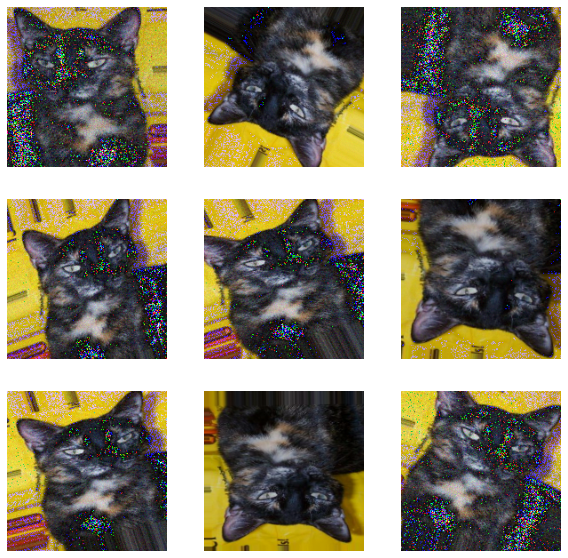

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    dir_It = datagen.flow(images, batch_size =1)
    for i in range(9):
        augmented_images = dir_It[0]
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].astype('uint8'))
        plt.axis("off")

### Feature extraction with a pretrained model

## P3: Using Pre-trained models and fine-tuning

A common approach is to have a general "pre-trained" model trained or defined in an unsupervised way and then add a dense (fully-connected layer) on top of this model for the specific task. Specifically, we start with a "base" model of VGG16, freeze the first layers, and only "fine-tune" the last layers in the network, as these layers are assumed to be most relevant for the specific task, but the first layers are general. In this regard, I've experimented with the effects of freezing more or fewer of the last layers for fine-tuning the VGG16 model (see the following cell). As I was not sure whether we should consider "a" dense layer, as mentioned in the explanation of the problem, or the provided structure (two Dense layers with Dropout) in this Colab, "Defining and training the densely connected classifier" section, I did my experiments for both.<br>
Variation # 8 represented the highest test accuracy.<br>
<br>
Comparing fine-tuning approach to the data-augmentation approach both for computational efficiency (time) and accuracy:<br>
As clearly can be seen in the experimented variations of the P2 and P3 sections, fine-tuning approach leads to a more significant accuracy performance metric; while, it has a higher computational efficiency (lower convergence time). That is, fine-tuning a general pre-trained model, VGG16, could achieve exceptional accuracy in just several training epochs (higher computational efficiency). It entirely makes sense as several of the model's layers were previously trained (set weights) using big data. By contrast, the data-augmentation approach resulted in lower test accuracy and required more training epochs (lower computational efficiency and higher required time). Furthermore, in the data-augmentation approach, we do extra operations to produce augmented data for the training phase, which has a high computational cost. 

**Experimented variations:**<br>
V#1: fine-tuning the last 2 layers, test accuracy = 0.898<br>
<br>
V#2: fine-tunning the last 3 layers, test accuracy = 0.922<br>
<br>
V#3: fine-tunning the last 4 layers, test accuracy = 0.921<br>
<br>
V#4: fine-tunning the last 5 layers, test accuracy = 0.905<br>
<br>
V#5: fine-tunning the last 6 layers, test accuracy = 0.906<br>
<br>
V#6: fine-tunning the last 3 layers with the provided structure, test accuracy = 0.957<br>
<br>
V#7: fine-tunning the last 4 layers with the provided structure, test accuracy = 0.952<br>
<br>
V#8: fine-tunning the last 5 layers with the provided structure, test accuracy = 0.960<br>


**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 19ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 16.1467 - accuracy: 0.9285 - val_loss: 6.5944 - val_accuracy: 0.9520
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 3.1876 - accuracy: 0.9755 - val_loss: 7.5918 - val_accuracy: 0.9550
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 2.1913 - accuracy: 0.9860 - val_loss: 4.7329 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 2.0020 - accuracy: 0.9875 - val_loss: 6.5746 - val_accuracy: 0.9630
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0537 - accuracy: 0.9910 - val_loss: 4.2482 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0320 - accuracy: 0.9925 - val_loss: 4.5705 - val_accuracy: 0.9730
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.7497 - accuracy: 0.9935 - val_loss: 4.8027 - val_accuracy: 0.9780
Epoch 8/20
63/63 [

**Plotting the results**

### Fine-tuning a pretrained model

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Freezing all layers until the fourth from the last**

**Fine-tuning the model**

###V#1: fine-tuning the last 2 layers


In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-2]:
    layer.trainable = False

In [ ]:
from keras.models import Model
model = conv_base.output
model = layers.Flatten(name="flatten")(model)
output_layer = layers.Dense(1, "sigmoid")(model)
model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 174ms/step - loss: 8.3439 - accuracy: 0.4610 - val_loss: 7.1206 - val_accuracy: 0.4890
Epoch 2/30
63/63 [==============================] - 11s 177ms/step - loss: 5.9651 - accuracy: 0.5550 - val_loss: 5.2250 - val_accuracy: 0.5830
Epoch 3/30
63/63 [==============================] - 12s 181ms/step - loss: 4.4675 - accuracy: 0.6385 - val_loss: 4.0084 - val_accuracy: 0.6590
Epoch 4/30
63/63 [==============================] - 11s 171ms/step - loss: 3.5015 - accuracy: 0.6980 - val_loss: 3.2011 - val_accuracy: 0.7060
Epoch 5/30
63/63 [==============================] - 11s 173ms/step - loss: 2.8074 - accuracy: 0.7395 - val_loss: 2.6504 - val_accuracy: 0.7520
Epoch 6/30
63/63 [==============================] - 11s 171ms/step - loss: 2.2922 - accuracy: 0.7760 - val_loss: 2.2559 - val_accuracy: 0.7840
Epoch 7/30
63/63 [==============================] - 11s 173ms/step - loss: 1.9050 - accuracy: 0.8040 - val_loss: 1.9771 - val_accuracy: 0.8090

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 1.0802 - accuracy: 0.8980
Test accuracy: 0.898


###V#2: fine-tuning the last 3 layers

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-3]:
    layer.trainable = False

In [ ]:
model = conv_base.output
model = layers.Flatten(name="flatten")(model)
output_layer = layers.Dense(1, "sigmoid")(model)
model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 185ms/step - loss: 2.9688 - accuracy: 0.7265 - val_loss: 1.4139 - val_accuracy: 0.8170
Epoch 2/30
63/63 [==============================] - 13s 194ms/step - loss: 0.6100 - accuracy: 0.9175 - val_loss: 1.0661 - val_accuracy: 0.8500
Epoch 3/30
63/63 [==============================] - 12s 194ms/step - loss: 0.1070 - accuracy: 0.9785 - val_loss: 0.9746 - val_accuracy: 0.8660
Epoch 4/30
63/63 [==============================] - 12s 186ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.9320 - val_accuracy: 0.8750
Epoch 5/30
63/63 [==============================] - 13s 204ms/step - loss: 2.3251e-04 - accuracy: 1.0000 - val_loss: 0.8653 - val_accuracy: 0.8910
Epoch 6/30
63/63 [==============================] - 12s 184ms/step - loss: 2.5995e-05 - accuracy: 1.0000 - val_loss: 0.8149 - val_accuracy: 0.8940
Epoch 7/30
63/63 [==============================] - 13s 201ms/step - loss: 2.2615e-06 - accuracy: 1.0000 - val_loss: 0.7832 - val_accu

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 114ms/step - loss: 0.7544 - accuracy: 0.9220
Test accuracy: 0.922


###V#3: fine-tuning the last 4 layers

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model = conv_base.output
model = layers.Flatten(name="flatten")(model)
output_layer = layers.Dense(1, "sigmoid")(model)
model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 195ms/step - loss: 1.5041 - accuracy: 0.8100 - val_loss: 0.7973 - val_accuracy: 0.8630
Epoch 2/30
63/63 [==============================] - 12s 191ms/step - loss: 0.1947 - accuracy: 0.9595 - val_loss: 0.6803 - val_accuracy: 0.8830
Epoch 3/30
63/63 [==============================] - 13s 198ms/step - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.6623 - val_accuracy: 0.8970
Epoch 4/30
63/63 [==============================] - 12s 187ms/step - loss: 3.4691e-04 - accuracy: 1.0000 - val_loss: 0.6654 - val_accuracy: 0.8990
Epoch 5/30
63/63 [==============================] - 13s 202ms/step - loss: 2.7669e-05 - accuracy: 1.0000 - val_loss: 0.6551 - val_accuracy: 0.9100
Epoch 6/30
63/63 [==============================] - 13s 204ms/step - loss: 5.6333e-06 - accuracy: 1.0000 - val_loss: 0.6435 - val_accuracy: 0.9150
Epoch 7/30
63/63 [==============================] - 13s 199ms/step - loss: 2.3658e-06 - accuracy: 1.0000 - val_loss: 0.6297 - val_

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 112ms/step - loss: 0.6475 - accuracy: 0.9210
Test accuracy: 0.921


###V#4: fine-tuning the last 5 layers

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-5]:
    layer.trainable = False

In [ ]:
model = conv_base.output
model = layers.Flatten(name="flatten")(model)
output_layer = layers.Dense(1, "sigmoid")(model)
model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 204ms/step - loss: 1.6765 - accuracy: 0.7745 - val_loss: 0.6394 - val_accuracy: 0.8670
Epoch 2/30
63/63 [==============================] - 13s 194ms/step - loss: 0.2019 - accuracy: 0.9500 - val_loss: 0.5576 - val_accuracy: 0.8780
Epoch 3/30
63/63 [==============================] - 14s 212ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 0.4993 - val_accuracy: 0.8930
Epoch 4/30
63/63 [==============================] - 13s 198ms/step - loss: 9.3051e-04 - accuracy: 1.0000 - val_loss: 0.4993 - val_accuracy: 0.9040
Epoch 5/30
63/63 [==============================] - 14s 211ms/step - loss: 1.0207e-04 - accuracy: 1.0000 - val_loss: 0.5243 - val_accuracy: 0.9110
Epoch 6/30
63/63 [==============================] - 13s 192ms/step - loss: 1.0108e-05 - accuracy: 1.0000 - val_loss: 0.5337 - val_accuracy: 0.9140
Epoch 7/30
63/63 [==============================] - 13s 195ms/step - loss: 1.0277e-06 - accuracy: 1.0000 - val_loss: 0.5270 - val_

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 113ms/step - loss: 0.4811 - accuracy: 0.9045
Test accuracy: 0.905


###V#5: fine-tuning the last 6 layers

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-6]:
    layer.trainable = False

In [ ]:
model = conv_base.output
model = layers.Flatten(name="flatten")(model)
output_layer = layers.Dense(1, "sigmoid")(model)
model = Model(inputs=conv_base.input, outputs=output_layer)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 216ms/step - loss: 1.0610 - accuracy: 0.8285 - val_loss: 0.5563 - val_accuracy: 0.8810
Epoch 2/30
63/63 [==============================] - 13s 206ms/step - loss: 0.0959 - accuracy: 0.9735 - val_loss: 0.4888 - val_accuracy: 0.8970
Epoch 3/30
63/63 [==============================] - 13s 198ms/step - loss: 0.0137 - accuracy: 0.9975 - val_loss: 0.4997 - val_accuracy: 0.8950
Epoch 4/30
63/63 [==============================] - 13s 199ms/step - loss: 6.1361e-04 - accuracy: 1.0000 - val_loss: 0.5006 - val_accuracy: 0.9100
Epoch 5/30
63/63 [==============================] - 13s 203ms/step - loss: 5.0623e-05 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.9120
Epoch 6/30
63/63 [==============================] - 13s 199ms/step - loss: 1.0959e-05 - accuracy: 1.0000 - val_loss: 0.4962 - val_accuracy: 0.9250
Epoch 7/30
63/63 [==============================] - 13s 200ms/step - loss: 2.7277e-06 - accuracy: 1.0000 - val_loss: 0.5540 - val_

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 0.3974 - accuracy: 0.9060
Test accuracy: 0.906


###V#6: fine-tuning the last 3 layers with the provided structure.

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-3]:
    layer.trainable = False

In [ ]:
model = conv_base.output
x = layers.Flatten()(model)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(conv_base.input, outputs)


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 187ms/step - loss: 3.5278 - accuracy: 0.7670 - val_loss: 0.4100 - val_accuracy: 0.9370
Epoch 2/30
63/63 [==============================] - 12s 188ms/step - loss: 0.5577 - accuracy: 0.9430 - val_loss: 0.3915 - val_accuracy: 0.9500
Epoch 3/30
63/63 [==============================] - 12s 180ms/step - loss: 0.3006 - accuracy: 0.9585 - val_loss: 0.4004 - val_accuracy: 0.9490
Epoch 4/30
63/63 [==============================] - 12s 191ms/step - loss: 0.1779 - accuracy: 0.9725 - val_loss: 0.3718 - val_accuracy: 0.9470
Epoch 5/30
63/63 [==============================] - 12s 185ms/step - loss: 0.1000 - accuracy: 0.9835 - val_loss: 0.4016 - val_accuracy: 0.9490
Epoch 6/30
63/63 [==============================] - 12s 180ms/step - loss: 0.0869 - accuracy: 0.9895 - val_loss: 0.4259 - val_accuracy: 0.9510
Epoch 7/30
63/63 [==============================] - 12s 180ms/step - loss: 0.0324 - accuracy: 0.9925 - val_loss: 0.4365 - val_accuracy: 0.9510

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 0.3749 - accuracy: 0.9570
Test accuracy: 0.957


###V#7: fine-tuning the last 4 layers with the provided structure.

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model = conv_base.output
x = layers.Flatten()(model)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(conv_base.input, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 196ms/step - loss: 0.9447 - accuracy: 0.8905 - val_loss: 0.4033 - val_accuracy: 0.9330
Epoch 2/30
63/63 [==============================] - 12s 193ms/step - loss: 0.1821 - accuracy: 0.9555 - val_loss: 0.3791 - val_accuracy: 0.9360
Epoch 3/30
63/63 [==============================] - 12s 192ms/step - loss: 0.0915 - accuracy: 0.9750 - val_loss: 0.3293 - val_accuracy: 0.9340
Epoch 4/30
63/63 [==============================] - 12s 189ms/step - loss: 0.0574 - accuracy: 0.9835 - val_loss: 0.3642 - val_accuracy: 0.9420
Epoch 5/30
63/63 [==============================] - 12s 188ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.4047 - val_accuracy: 0.9440
Epoch 6/30
63/63 [==============================] - 12s 187ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.4389 - val_accuracy: 0.9440
Epoch 7/30
63/63 [==============================] - 12s 193ms/step - loss: 0.0174 - accuracy: 0.9960 - val_loss: 0.4513 - val_accuracy: 0.9450

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 0.2630 - accuracy: 0.9525
Test accuracy: 0.952


###V#8: fine-tuning the last 5 layers with the provided structure.

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-5]:
    layer.trainable = False

In [ ]:
model = conv_base.output
x = layers.Flatten()(model)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(conv_base.input, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 196ms/step - loss: 0.7020 - accuracy: 0.9015 - val_loss: 0.3413 - val_accuracy: 0.9530
Epoch 2/30
63/63 [==============================] - 12s 194ms/step - loss: 0.0992 - accuracy: 0.9805 - val_loss: 0.2896 - val_accuracy: 0.9510
Epoch 3/30
63/63 [==============================] - 12s 188ms/step - loss: 0.0763 - accuracy: 0.9845 - val_loss: 0.3215 - val_accuracy: 0.9480
Epoch 4/30
63/63 [==============================] - 12s 188ms/step - loss: 0.0535 - accuracy: 0.9890 - val_loss: 0.3086 - val_accuracy: 0.9530
Epoch 5/30
63/63 [==============================] - 12s 190ms/step - loss: 0.0272 - accuracy: 0.9945 - val_loss: 0.3495 - val_accuracy: 0.9500
Epoch 6/30
63/63 [==============================] - 12s 191ms/step - loss: 0.0035 - accuracy: 0.9980 - val_loss: 0.3884 - val_accuracy: 0.9540
Epoch 7/30
63/63 [==============================] - 12s 188ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.4241 - val_accuracy: 0.9560

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 112ms/step - loss: 0.2434 - accuracy: 0.9595
Test accuracy: 0.960
